
game area looks more or less like this \
https://boardgamegeek.com/image/7786608/mlem-space-agency \
for now, distance maximizing will happen. potential for ML for points maximizing is there, but in future release


In [109]:
dice_dictionary = {
    1 : 1,
    2 : 2, 
    3 : 3,
    4 : 4,
    5 : 2, 
    6 : "booster"
} #kitty dice has 2 on two different faces

game_area_dictionary = {
    0 : [1, 2, "booster"],
    1 : [1, 3, "booster"],
    2 : [1, 3, "booster"],
    3 : [2, 3, "booster"],
    4 : [1, 4], 
    5 : [1, 2, "booster"], 
    6 : [1, 2 ,4],
    7 : [1, 2],
    8 : [1, 3],
    9 : [2, 4],
    10: [1, 3, 4],
    11: [1, "booster"],
    12: [3, "booster"],
    13: [1, 3],
    14: [3, 4],
    15: [1, "booster"],
    16: [1, 2, 4],
    17: [2, 3, 4],
    18: [1, 4, "booster"],
    19: [1, "booster"],
    20: [2, 3],
    21: [2, "booster"],
    22: [4, "booster"],
    23: [3, "booster"],
    24: [2, "booster"],
    25: [1, "booster"]
}

double_booster_list = [2, 5, 12, 15, 21]
# triple_booster_list = [19] #only one triple booster like that

In [10]:
current_field = 0
game_area_dictionary[current_field]

[1, 2, 'booster']

In [11]:
import random
def roll_dices(available_dices): #takes the number of available dices, returns a list of integers between 1 and 6 posing as dice walls 
    return [random.randint(1, 6) for _ in range(available_dices)] 

def translate_dice(rolled_list): #translate regular dice into kitty dice. can be incorporated into roll dice but left here for readability purposes
    #takes in a list of integers, returns translated into dictionary.
    kitty_dices = []
    for i in rolled_list:
        kitty_dices.append(dice_dictionary[i])
    
    return kitty_dices

def check_possibilities(current_field, kitty_dices):
    possibilities = []
    for dice_i in kitty_dices:
        if dice_i in game_area_dictionary[current_field]:
            possibilities.append(dice_i)
            
    return possibilities

def make_decision(current_field, possibilities):
    if not possibilities:
        return False #break the game if there are no legal moves, thus loose rocket 
    elif "booster" in possibilities:
        if current_field in double_booster_list:
            return (possibilities.count("booster") * 2, "booster" )#workaround, just skip checking the number of dices when using boosters
        elif current_field == 19: #only one triple booster, might as well skip the list
            return (possibilities.count("booster") * 3, "booster" )
        return (possibilities.count("booster"), "booster" )#always go for the booster if possible. really should just disguise booster as a number to avoid mixing types
    else:
        for i in range(4,0,-1):#maximize output from our dice
            if i in possibilities:
                return (possibilities.count(i), i)











In [12]:
#starting conditions
current_field = 0
available_dices = 6

In [88]:
def main_loop(current_field,available_dices):

    while current_field < 25:
        
        rolled_dices = roll_dices(available_dices)
        translated_dices = translate_dice(rolled_dices)
        possibilities = check_possibilities(current_field, translated_dices)
        decision = make_decision(current_field, possibilities)
        if decision is False:
            # print('crash')
            break #rocket crashes
        else:
            used_dices, dice_type = decision #could do it with "try"  
        
            if dice_type == "booster": #movement, dont loose dices with boosters
                current_field = min(25,current_field + used_dices )
            else:
                current_field = min(25,current_field + used_dices * dice_type)
                available_dices = max(1, available_dices - used_dices)

    # print(rolled_dices, translated_dices, possibilities, decision, current_field)
    return current_field

In [50]:
for i in range(1,7):

    print(make_decision(6,check_possibilities(i,translate_dice(roll_dices(6)))))

(2, 'booster')
(2, 'booster')
(1, 'booster')
(4, 1)
(1, 'booster')
(3, 2)


In [45]:
import numpy as np

In [72]:

def combo_game_loop(starting_field): 
    results_list = []
    for i in range(1000000):
        current_field = starting_field
        available_dices = 6
        current_field = main_loop(current_field, available_dices)
        results_list.append(current_field)
    return np.array(results_list)
        # print(current_field)

In [62]:
import timeit

In [98]:
import time
start_time = time.time()
result = combo_game_loop(0) #starting from zero
print("--- %s seconds ---" % (time.time() - start_time))


--- 7.596064567565918 seconds ---


In [42]:
import matplotlib.pyplot as plt

(array([  1383.,   6468.,   8374.,    562.,  59233.,   2676.,   6406.,
         15747.,  91580.,  38817.,  38472., 111841.,  88410.,  77402.,
         94217.,  33384.,  16711.,  19163.,  40504.,  46574.,  34091.,
         14270.,  52273.,  44936.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
        13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24.]),
 <BarContainer object of 24 artists>)

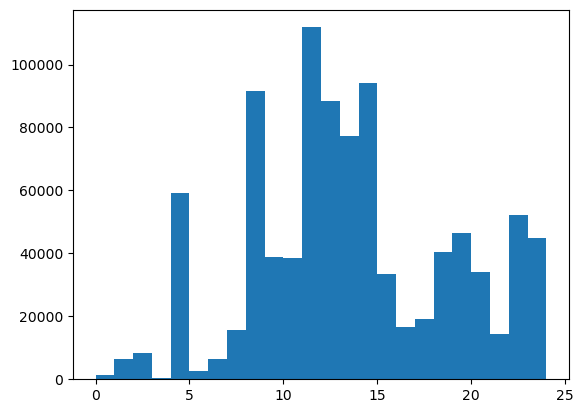

In [64]:
plt.hist(result, bins=range(min(result), max(result)))

In [65]:
from collections import Counter

In [107]:
counter = Counter(result)
sorted_counter = sorted(counter.items())
print("Value | frequency  | % chance")
print("----------------------------------")
for value, frequency in sorted_counter:
    print(f"{value:^6} | {frequency:^9} | {frequency/10000:^12}")

Value | frequency  | % chance
----------------------------------
  0    |   1365    |    0.1365   
  1    |   6407    |    0.6407   
  2    |   8459    |    0.8459   
  3    |    575    |    0.0575   
  4    |   58928   |    5.8928   
  5    |   2554    |    0.2554   
  6    |   6410    |    0.641    
  7    |   15557   |    1.5557   
  8    |   91707   |    9.1707   
  9    |   38654   |    3.8654   
  10   |   38325   |    3.8325   
  11   |  110899   |   11.0899   
  12   |   88124   |    8.8124   
  13   |   77386   |    7.7386   
  14   |   94330   |    9.433    
  15   |   33530   |    3.353    
  16   |   16835   |    1.6835   
  17   |   19116   |    1.9116   
  18   |   40791   |    4.0791   
  19   |   46659   |    4.6659   
  20   |   34284   |    3.4284   
  21   |   14179   |    1.4179   
  22   |   52858   |    5.2858   
  23   |   36385   |    3.6385   
  24   |   8652    |    0.8652   
  25   |   57031   |    5.7031   


In [100]:
start_time = time.time()
result_sattelite = combo_game_loop(3) #starting from the sattelite
print("--- %s seconds ---" % (time.time() - start_time))


--- 6.733752012252808 seconds ---


(array([ 1324., 35342.,   531.,  1028.,  5959., 30176., 20834., 12872.,
        75036., 82477., 95763., 95362., 51102., 22785., 24290., 54503.,
        69232., 54219., 24850., 79116., 72232.]),
 array([ 3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13., 14., 15.,
        16., 17., 18., 19., 20., 21., 22., 23., 24.]),
 <BarContainer object of 21 artists>)

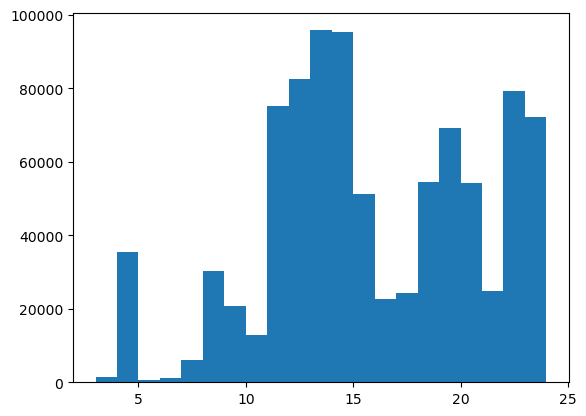

In [105]:
plt.hist(result_sattelite, bins=range(min(result_sattelite), max(result_sattelite)), alpha=1, label='sattelite start')

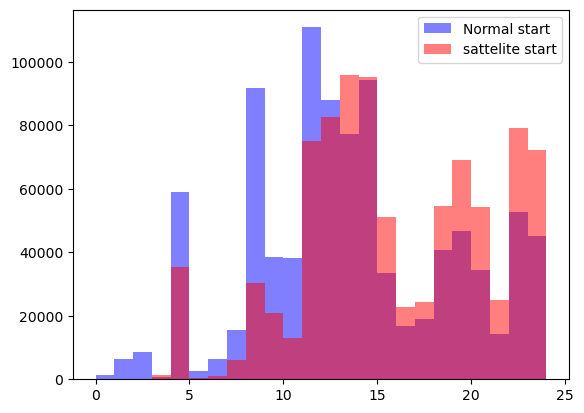

In [118]:
plt.hist(result, bins=range(min(result), max(result)), alpha=0.5, label='Normal start', color='b')
plt.hist(result_sattelite, bins=range(min(result_sattelite), max(result_sattelite)), alpha=0.5, label='sattelite start', color='red')

plt.legend()
plt.show()
#using sattelite increases the expected distance quite significantly

In [106]:
counter2 = Counter(result_sattelite)
sorted_counter2 = sorted(counter2.items())
print("Value | frequency  | % chance")
print("----------------------------------")
for value, frequency in sorted_counter2:
    print(f"{value:^6} | {frequency:^9} | {frequency/10000:^12}")

Value | frequency  | % chance
----------------------------------
  3    |   1324    |    0.1324   
  4    |   35342   |    3.5342   
  5    |    531    |    0.0531   
  6    |   1028    |    0.1028   
  7    |   5959    |    0.5959   
  8    |   30176   |    3.0176   
  9    |   20834   |    2.0834   
  10   |   12872   |    1.2872   
  11   |   75036   |    7.5036   
  12   |   82477   |    8.2477   
  13   |   95763   |    9.5763   
  14   |   95362   |    9.5362   
  15   |   51102   |    5.1102   
  16   |   22785   |    2.2785   
  17   |   24290   |    2.429    
  18   |   54503   |    5.4503   
  19   |   69232   |    6.9232   
  20   |   54219   |    5.4219   
  21   |   24850   |    2.485    
  22   |   79116   |    7.9116   
  23   |   57807   |    5.7807   
  24   |   14425   |    1.4425   
  25   |   90967   |    9.0967   
